 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [103]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [104]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_pd = pd.read_csv(whale_returns_csv, index_col = "Date", parse_dates = True)
whale_pd.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [105]:
# Count nulls
# YOUR CODE HERE
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [106]:
# Drop nulls
# YOUR CODE HERE
whale_pd.dropna(inplace = True)
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [107]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_pd = pd.read_csv(algo_returns_csv, index_col = "Date", parse_dates = True)
algo_pd.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [108]:
# Count nulls
# YOUR CODE HERE
algo_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [109]:
# Drop nulls
# YOUR CODE HERE
algo_pd.dropna(inplace = True)
algo_pd.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [110]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_pd = pd.read_csv(sp500_history_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
sp500_pd.sort_index(ascending = True, inplace = True)
sp500_pd.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [111]:
# Check Data Types
# YOUR CODE HERE
sp500_pd.dtypes

Close    object
dtype: object

In [119]:
# Fix Data Types
# YOUR CODE HERE
sp500_pd = sp500_pd.str.replace('$','').astype("float")
sp500_pd.sort_index(inplace = True)
sp500_pd

In [113]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_pd['Close'] = sp500_pd['Close'].str.replace('$', '')

In [114]:
# Drop nulls
# YOUR CODE HERE
sp500_pd.dropna(inplace = True)
sp500_pd.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [115]:
# Rename Column
# YOUR CODE HERE
sp500_pd.rename(columns = {"Close":"sp500"}, inplace = True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [86]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
all_returns = pd.concat([whale_pd, sp500_pd, algo_pd], axis = "columns", join = "inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,sp500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,2107.78,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,2098.53,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,2101.04,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,2071.26,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,2079.43,-0.005447,0.001303


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

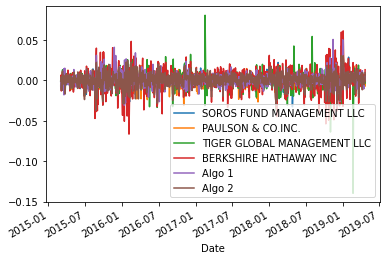

In [121]:
# Plot daily returns
# YOUR CODE HERE
all_returns.plot()

In [124]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + all_returns).cumprod()
cumulative_returns.head()
cumulative_returns.plot(figsize=(10,5))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

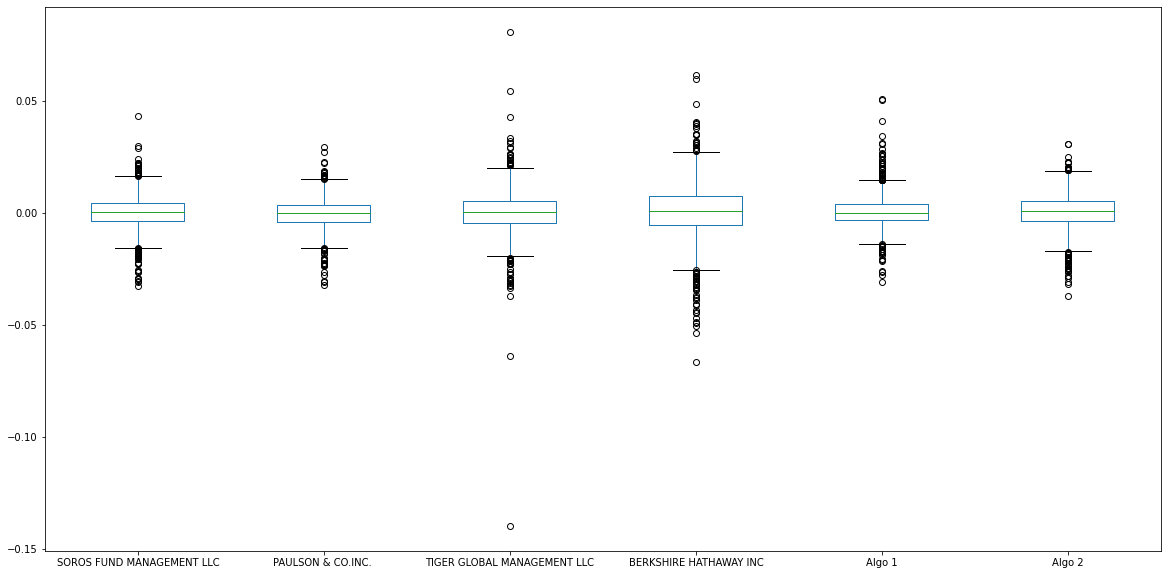

In [125]:
# Box plot to visually show risk
# YOUR CODE HERE
all_returns.plot(kind = "box", figsize = (20,10))

In [90]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = all_returns.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64


In [96]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
riskier = daily_std[daily_std > daily_std["S&P 500"]]
print(riskier)

In [92]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

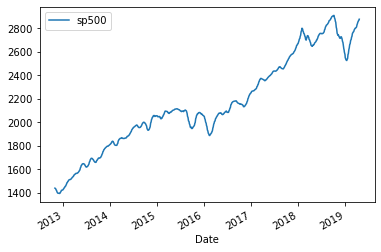

In [128]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
sp500_pd.rolling(window=21).mean().plot()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000


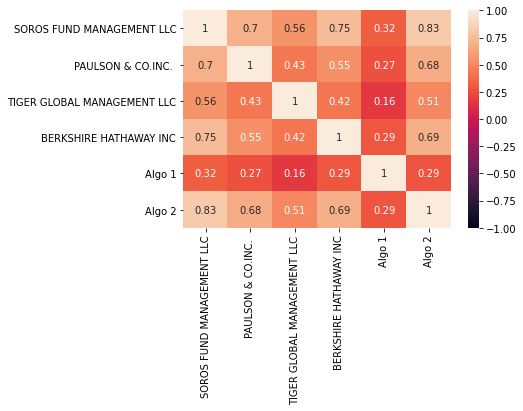

In [100]:
# Construct a correlation table
# YOUR CODE HERE
import seaborn as sns
correlation = all_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)
correlation

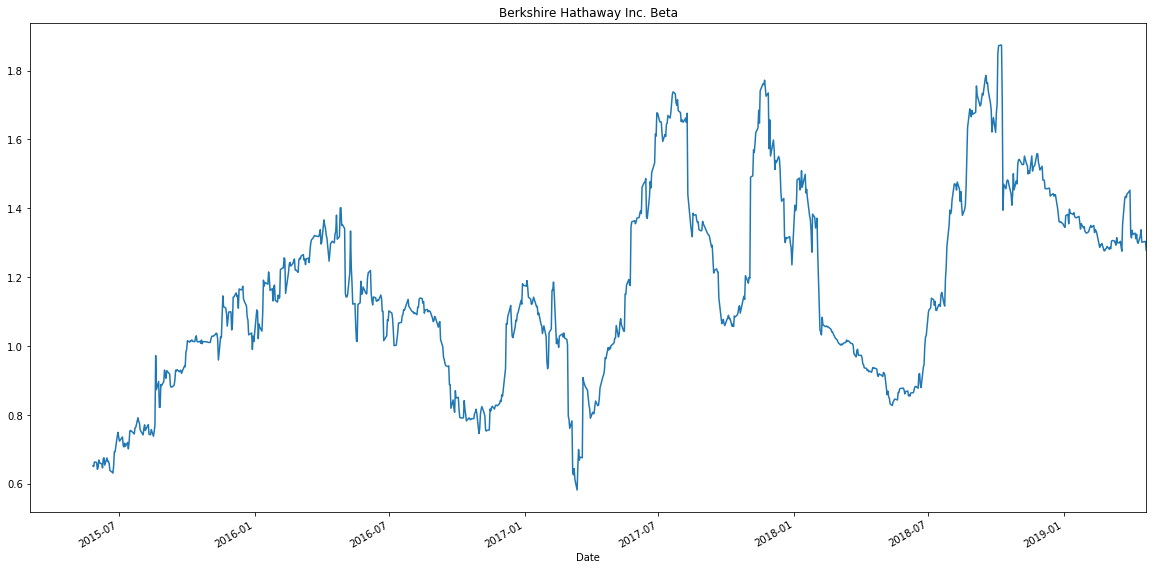

In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
rolling_covariance = df_daily['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_daily['sp500'])
rolling_variance = df_daily['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(15, 8), title='Rolling 60-Day Beta of BH')

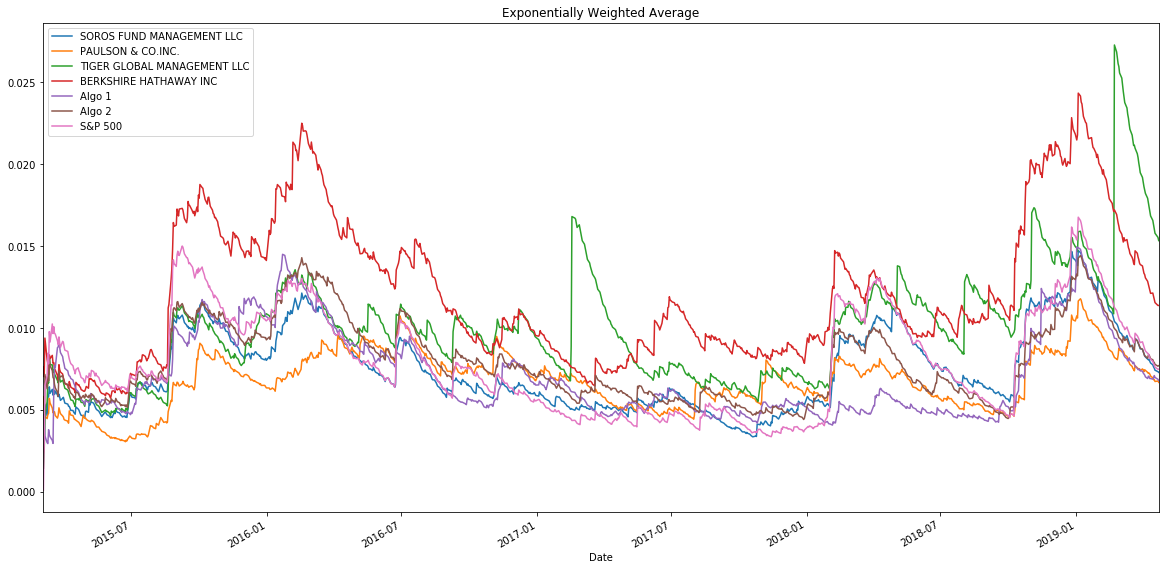

In [25]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
daily_ewm = daily.ewm(span = 21,adjust = False).mean()
(1+daily_ewm).cumprod().plot(figsize = (15,8))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [129]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
dtype: float64

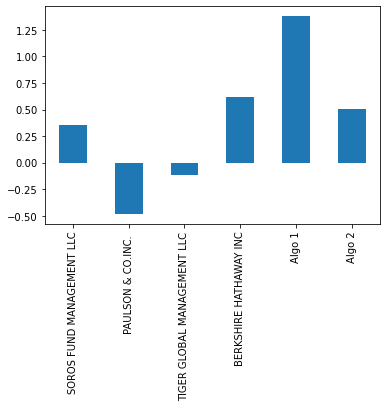

In [130]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot.bar()

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [132]:
# Read the first stock
# YOUR CODE HERE
lulu_history = pd.read_csv(Path("Resources/Lulu.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
lulu_history.rename(columns = {"Close":"LuLu"}, inplace = True)
lulu_history.head()

,LuLu
Date,
2019-10-08,191.37
2019-10-09,192.16
2019-10-10,198.13
2019-10-11,201.62
2019-10-14,203.04


In [135]:
# Read the second stock
# YOUR CODE HERE
tree_history = pd.read_csv(Path("Resources/tree.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
tree_history.rename(columns = {"Close":"Tree"}, inplace = True)
tree_history.head()

,Tree
Date,
2019-10-08,307.41
2019-10-09,303.30
2019-10-10,308.54
2019-10-11,312.02
2019-10-14,313.56


In [137]:
# Read the third stock
# YOUR CODE HERE
tesla_history = pd.read_csv(Path("Resources/tesla.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
tesla_history.rename(columns = {"Close":"Tesla"}, inplace = True)
tesla_history.head()

,Tesla
Date,
2019-10-08,48.01
2019-10-09,48.91
2019-10-10,48.95
2019-10-11,49.58
2019-10-14,51.39


In [138]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
my_stocks = pd.concat((lulu_history, tree_history, tesla_history), axis = 1, join= "inner")
my_stocks.sort_index(ascending = True, inplace = True)
my_stocks.head()

,LuLu,Tree,Tesla
Date,,,
2019-10-08,191.37,307.41,48.01
2019-10-09,192.16,303.30,48.91
2019-10-10,198.13,308.54,48.95
2019-10-11,201.62,312.02,49.58
2019-10-14,203.04,313.56,51.39


In [139]:
# Reset the index
# YOUR CODE HERE
my_stocks.index = my_stocks.index.normalize()

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [140]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
my_portfolio = my_stocks.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()

Date
2019-10-09   -0.004426
2019-10-10    0.020666
2019-10-11    0.013678
2019-10-14    0.008469
2019-10-15    0.008556
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [143]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
portfolio_returns = pd.concat((my_portfolio_returns,daily_returns), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns

In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
portfolio_returns.dropna(inplace=True)
portfolio_returns

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [38]:
# Risk
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

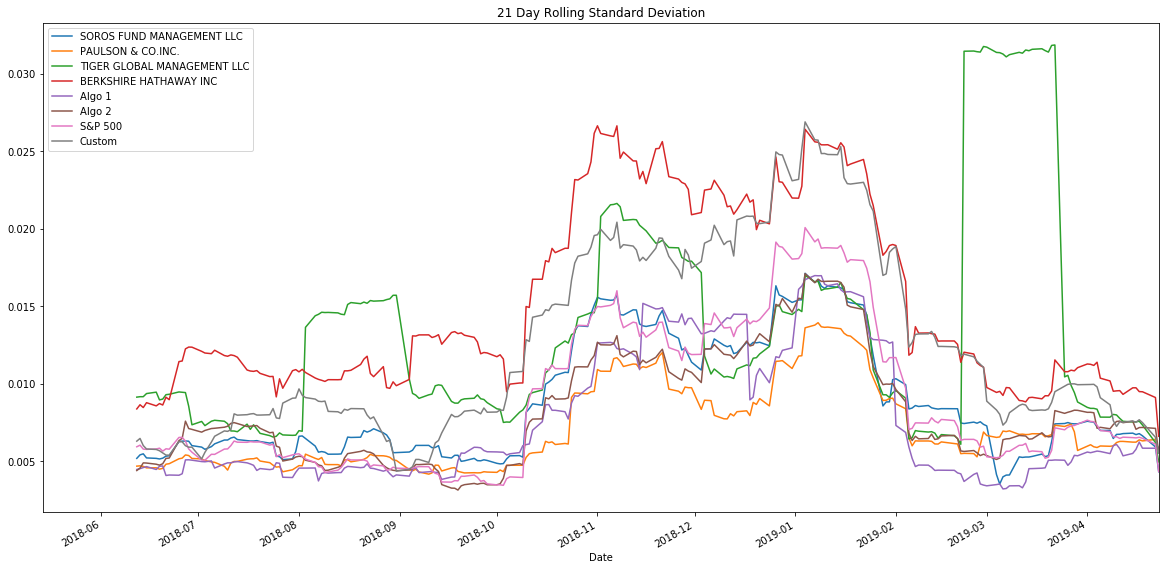

In [39]:
# Rolling
# YOUR CODE HERE

In [40]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

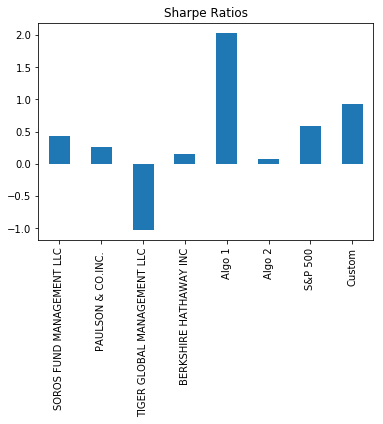

In [41]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [42]:
# Create a correlation analysis
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.73325
PAULSON & CO.INC.,0.791962,1,0.485375,0.650758,0.361301,0.783656,0.76668,0.64421
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1,0.325457,0.114554,0.409496,0.48103,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1,0.327,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327,1,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1,0.875721,0.739936
S&P 500,0.876981,0.76668,0.48103,0.852303,0.289358,0.875721,1,0.871875
Custom,0.73325,0.64421,0.391972,0.801158,0.261471,0.739936,0.871875,1


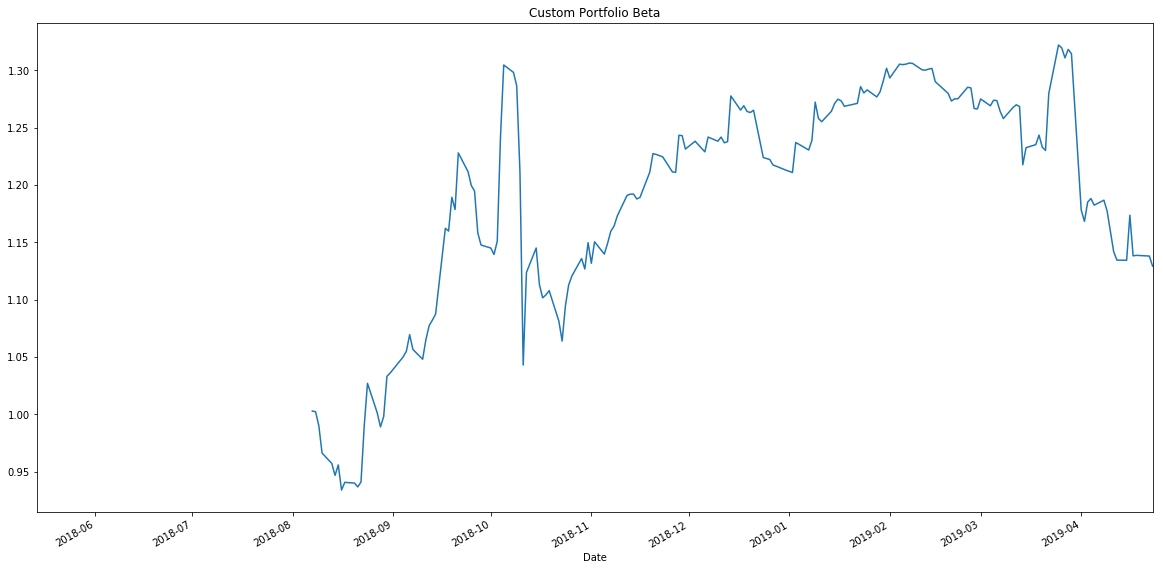

In [43]:
# Beta
# YOUR CODE HERE